# Linear Regression

- Morning
  - How do I find the line that minimizes squared error?
  - What distributional assumptions does Linear Regression make?
  - What statistical claims (hypotheses) do I get to make about regression coefficients & predictions?
  - How can I check the validity of LR's assumptions?
  - **Always Plot The Residuals**
    - Are they homoscedastic?
    - Are they normal?
  - What is multicollinearity and how do I deal with it?
  
- Afternoon
  - How can I transform my data so that it is more linear & homoscedastic?
  - How do I interpret coefficients for categorical features?

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size'   : 14}
matplotlib.rc('font', **font)

Let's look at the `cars` data set

In [57]:
cars = pd.read_csv('data/cars_multivariate.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Afternoon: transformations & categorical variables

Let's go back to the `cars` data for a bit. Remember how it wasn't really very linear?

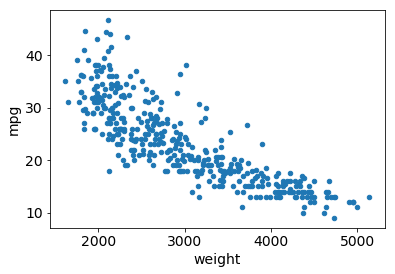

In [58]:
cars.plot.scatter('weight','mpg');

In [59]:
y = cars['mpg']
X = sm.add_constant(cars['weight'])

In [60]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          2.97e-103
Time:                        13:36:11   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

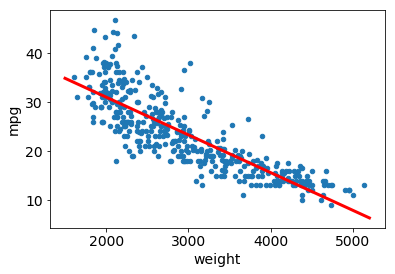

In [61]:
xx = np.linspace(1500, 5200)
ax = cars.plot.scatter('weight','mpg')
ax.plot(xx, results.predict(sm.add_constant(xx)), color='r', lw=3);

What if I think the `mpg` has a nonlinear relationship with `weight`? Something like
$$ y = ax + bx^2 + d e^{0.001x} $$

Well, I can just create new features that are transformations of $x$, then perform linear regression on those features.

In [62]:
X['weight2'] = X['weight']**2
X['eweight'] = np.exp(X['weight']/1000)

In [63]:
X.head()

,const,weight,weight2,eweight
0,1.0,3504.0,12278016.0,33.248179
1,1.0,3693.0,13638249.0,40.165162
2,1.0,3436.0,11806096.0,31.062459
3,1.0,3433.0,11785489.0,30.969412
4,1.0,3449.0,11895601.0,31.468908


In [64]:
model2 = sm.OLS(y, X)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     329.2
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          6.21e-107
Time:                        13:36:14   Log-Likelihood:                -1132.9
No. Observations:                 398   AIC:                             2274.
Df Residuals:                     394   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.1393      6.180     10.217      0.000      50.990      75.289
weight        -0.0192      0.005     -3.955      0.000      -0.029      -0.010
weight2     1.832e-06   1.05e-06      1.750      0.081   -2.26e-07    3.89e-06
eweight       -0.0073      0.063     -0.115      0.909      -0.132       0.117
==============================================================================
Omnibus:                       51.914   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.374
Skew:                           0.786   Prob(JB):                     6.45e-20
Kurtosis:                       4.691   Cond. No.                     3.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
p = results2.params
p

const      63.139285
weight     -0.019151
weight2     0.000002
eweight    -0.007280
dtype: float64

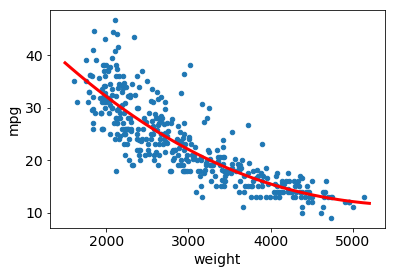

In [68]:
xx = np.linspace(1500, 5200)
curve = (p['const'] + 
         p['weight']*xx + 
         p['weight2']*(xx**2) + 
         p['eweight']*(np.exp(xx/1000)))
ax = cars.plot.scatter('weight','mpg')
ax.plot(xx, curve, color='r', lw=3);

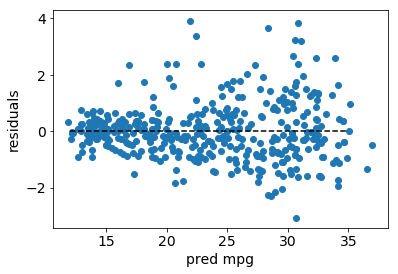

In [69]:
stud_resids2 = results2.outlier_test()['student_resid']

plt.scatter(results2.fittedvalues, stud_resids2)
plt.hlines(0,12, 35, 'k', linestyle='dashed')
plt.xlabel('pred mpg')
plt.ylabel('residuals');

You can transform $y$ also

In [70]:
y_logged = np.log(cars['mpg'])

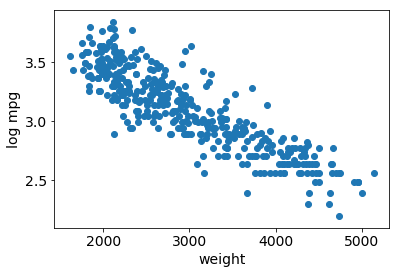

In [71]:
plt.scatter(cars['weight'], y_logged)
plt.xlabel('weight')
plt.ylabel('log mpg');

In [76]:
model3 = sm.OLS(y_logged, sm.add_constant(cars['weight']))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1301.
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          3.45e-127
Time:                        14:00:01   Log-Likelihood:                 155.09
No. Observations:                 398   AIC:                            -306.2
Df Residuals:                     396   BIC:                            -298.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1445      0.030    137.818      0.000       4.085       4.204
weight        -0.0004   9.74e-06    -36.066      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        5.176   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.678
Skew:                           0.163   Prob(JB):                       0.0585
Kurtosis:                       3.485   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

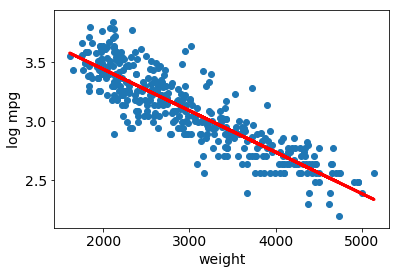

In [77]:
plt.scatter(cars['weight'], y_logged)
plt.plot(cars['weight'], results3.fittedvalues,
        color='r',
        linewidth=3)
plt.xlabel('weight')
plt.ylabel('log mpg');

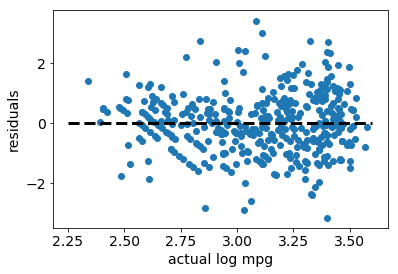

In [78]:
stud_resids3 = results3.outlier_test()['student_resid']

plt.scatter(results3.fittedvalues, stud_resids3)
plt.hlines(0,2.25, 3.6, 'k', 
           linestyle='dashed',
           linewidth=3)
plt.xlabel('actual log mpg')
plt.ylabel('residuals');

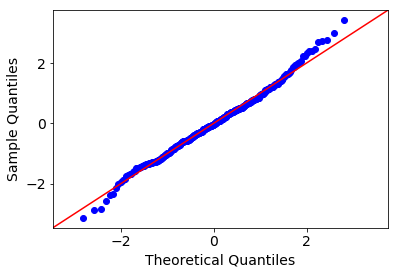

In [79]:
ax = sm.graphics.qqplot(stud_resids3, line='45')

# Categorical features: Insects

In [80]:
insects = pd.read_csv('data/insects.csv', sep='\t')
insects.head(10)

,continent,latitude,wingsize,sex
0,1,40.5,941.111111,0
1,1,42.0,924.444444,0
2,1,43.6,924.204444,0
3,1,45.7,915.217778,0
4,1,45.9,905.471111,0
5,1,47.4,896.004444,0
6,1,50.0,913.000000,0
7,1,51.8,916.440000,0
8,1,53.8,933.417778,0
9,1,54.8,934.240000,0


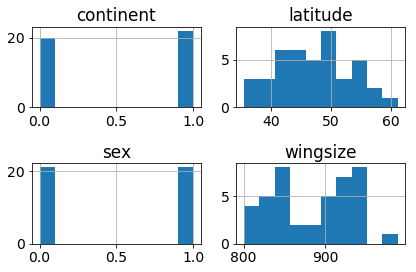

In [81]:
insects.hist()
plt.tight_layout();

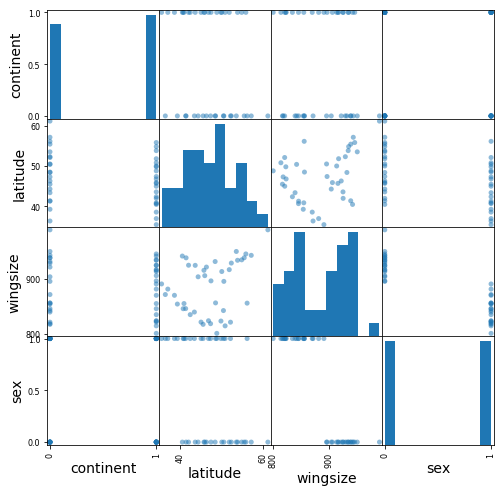

In [82]:
pd.plotting.scatter_matrix(insects, figsize=(8, 8), s=100);

`wing size` vs `latitude` looks interesting. enhance!

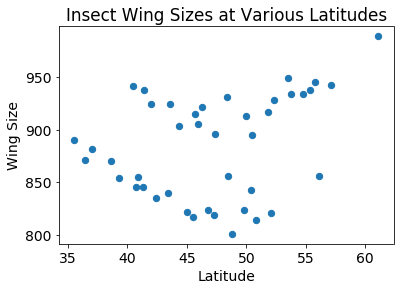

In [83]:
plt.scatter(insects['latitude'], insects['wingsize'], s=40)
plt.xlabel("Latitude")
plt.ylabel("Wing Size")
plt.title("Insect Wing Sizes at Various Latitudes");

### Are The Two Clusters Associated With Either Continent or Sex?

We can discover if the two clusters in the data are associated with either `continent` or `sex` through a well chosen visualization.  Let's make the same scatterplot from before, but color each point either red or blue, according to the value of `continent` or `sex`.

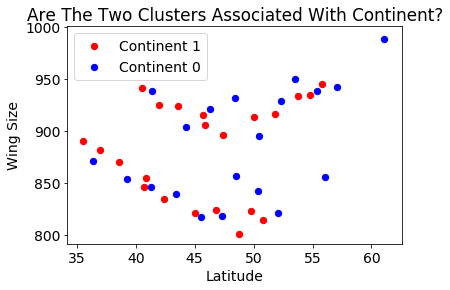

In [85]:
continent_boolean = insects['continent'].astype(bool)
plt.scatter(insects['latitude'][continent_boolean], 
           insects['wingsize'][continent_boolean], 
           s=40, c="red", label="Continent 1")
plt.scatter(insects['latitude'][~continent_boolean], 
           insects['wingsize'][~continent_boolean],
           s=40, c="blue", label="Continent 0")
plt.xlabel("Latitude")
plt.ylabel("Wing Size")
plt.title("Are The Two Clusters Associated With Continent?")
plt.legend();

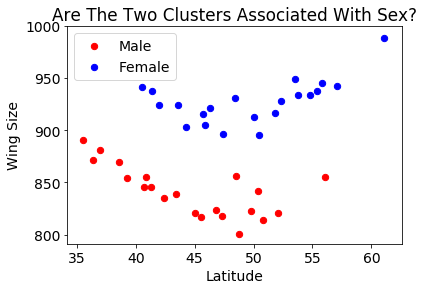

In [86]:
def make_insect_scatter():
    sex_boolean = insects['sex'].astype(bool)
    plt.scatter(insects['latitude'][sex_boolean], 
               insects['wingsize'][sex_boolean], 
               s=40, c="red", label="Male")
    plt.scatter(insects['latitude'][~sex_boolean], 
               insects['wingsize'][~sex_boolean],
               s=40, c="blue", label="Female")
    plt.xlabel("Latitude")
    plt.ylabel("Wing Size")
    plt.title("Are The Two Clusters Associated With Sex?")
    plt.legend()

make_insect_scatter()

In [88]:
linear_model = sm.OLS(insects['wingsize'], sm.add_constant(insects['latitude']))
insects_model = linear_model.fit()
insects_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     4.595
Date:                Thu, 27 Sep 2018   Prob (F-statistic):             0.0382
Time:                        14:01:51   Log-Likelihood:                -220.17
No. Observations:                  42   AIC:                             444.3
Df Residuals:                      40   BIC:                             447.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        765.1966     56.276     13.597      0.000     651.458     878.935
latitude       2.5400      1.185      2.144      0.038       0.145       4.935
==============================================================================
Omnibus:                        7.752   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                3.189
Skew:                          -0.380   Prob(JB):                        0.203
Kurtosis:                       1.884   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

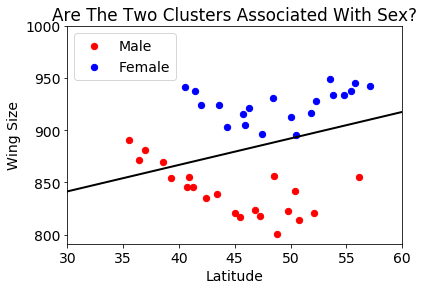

In [89]:
make_insect_scatter()

x = np.linspace(30, 60, num=250)

b0, b1 = insects_model.params
plt.plot(x, b0 + b1*x,
           linewidth=2, c="black")
plt.xlim(30, 60);

In [90]:
def plot_resids(model, feature=None, data=None):
    stud_resids = model.outlier_test()['student_resid']
    
    if feature is not None:
        plt.scatter(data[feature], stud_resids)
        plt.hlines(0, data[feature].min(), 
               data[feature].max(), linestyle="--")
        plt.xlabel(feature)
        plt.ylabel('studentized residual')
    else:
        plt.scatter(model.fittedvalues, stud_resids)
        plt.hlines(0, model.fittedvalues.min(), 
               model.fittedvalues.max(), linestyle="--")
        plt.xlabel('predicted wing size')
        plt.ylabel('studentized residual')

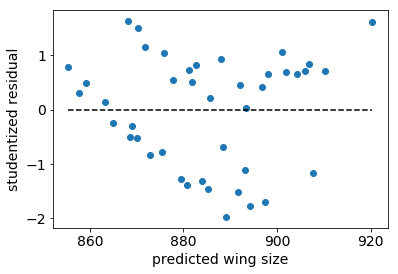

In [91]:
plot_resids(insects_model)

## Accounting for the sex of the insect

It would much better to take account of the sex of the insect and fit two lines, we make one line of prediction of the wing size given the latitude for males, and another for females.

The easiest way to do this is to modify our equation:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Sex} $$

There is now another term: if the insect is male we *add $c$* to the prediction, otherwise we add nothing.

Again, linear regression can find an equation of this shape describing the data:

In [92]:
linear_model = sm.OLS(insects['wingsize'], 
                      sm.add_constant(insects[['latitude','sex']]))
insects_model_with_sex = linear_model.fit()
insects_model_with_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     75.12
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           4.21e-14
Time:                        14:05:11   Log-Likelihood:                -189.29
No. Observations:                  42   AIC:                             384.6
Df Residuals:                      39   BIC:                             389.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        948.2463     31.665     29.947      0.000     884.199    1012.294
latitude      -0.4120      0.630     -0.653      0.517      -1.687       0.863
sex          -88.0281      7.699    -11.434      0.000    -103.600     -72.456
==============================================================================
Omnibus:                        3.802   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                2.698
Skew:                           0.587   Prob(JB):                        0.259
Kurtosis:                       3.404   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

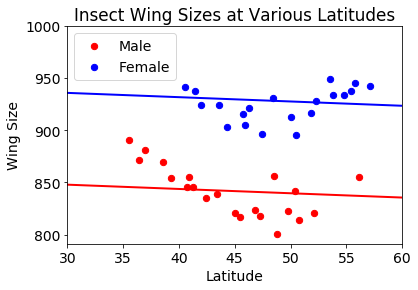

In [93]:
fig, ax = plt.subplots()

make_insect_scatter()

b0, b1, b2 = insects_model_with_sex.params
x = np.linspace(30, 60, num=250)
plt.plot(x, b0 + (b1 * x),
       linewidth=2, c="blue")
plt.plot(x, b0 + (b1 * x) + b2,
       linewidth=2, c="red")
plt.xlim(30, 60)
plt.xlabel("Latitude")
plt.ylabel("Wing Size")
plt.title("Insect Wing Sizes at Various Latitudes")
plt.legend();

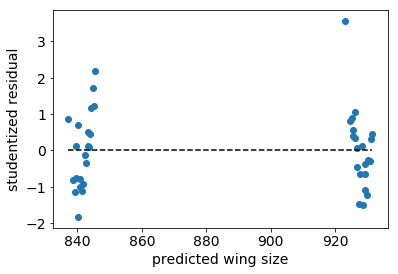

In [94]:
plot_resids(insects_model_with_sex)

(836, 846)

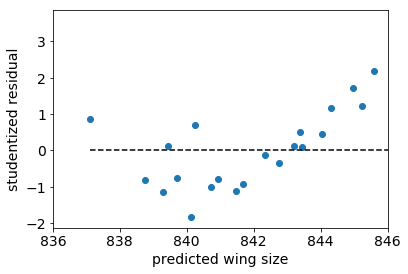

In [95]:
plot_resids(insects_model_with_sex)
plt.xlim([836,846])

(922, 933)

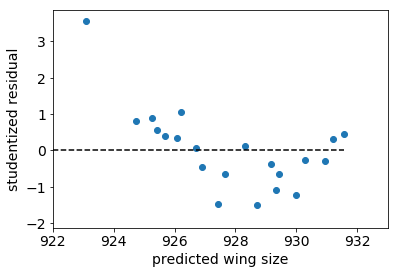

In [96]:
plot_resids(insects_model_with_sex)
plt.xlim([922, 933])

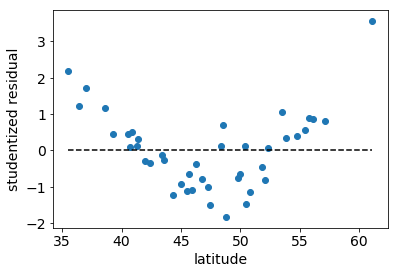

In [97]:
plot_resids(insects_model_with_sex, feature='latitude', data=insects)

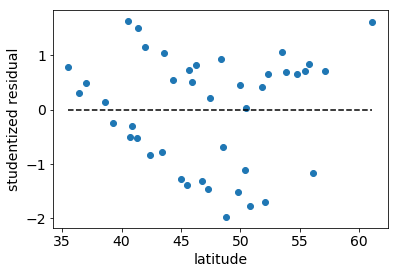

In [98]:
plot_resids(insects_model, feature='latitude', data=insects)

### Interaction term:
$ y \sim a + b*Latitude + c*Sex*Latitude$

In [101]:
insects['interaction'] = insects['sex']*insects['latitude']

linear_model = sm.OLS(insects['wingsize'], 
                      sm.add_constant(insects[['latitude',
                                               'interaction']]))
insects_model_inter = linear_model.fit()
insects_model_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     102.9
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           2.79e-16
Time:                        14:11:42   Log-Likelihood:                -183.89
No. Observations:                  42   AIC:                             373.8
Df Residuals:                      39   BIC:                             379.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         905.2735     26.186     34.570      0.000     852.306     958.241
latitude        0.4727      0.529      0.894      0.377      -0.597       1.542
interaction    -1.9151      0.143    -13.436      0.000      -2.203      -1.627
==============================================================================
Omnibus:                        1.979   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.339
Skew:                           0.434   Prob(JB):                        0.512
Kurtosis:                       3.113   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

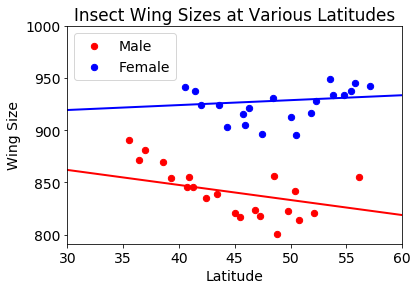

In [102]:
make_insect_scatter()
x = np.linspace(30, 60, num=250)

b0, b1, b2 = insects_model_inter.params
plt.plot(x, b0 + b1 * x,
       linewidth=2, c="blue")
plt.plot(x, b0 + (b1 + b2)*x,
       linewidth=2, c="red")
plt.xlim(30, 60)
plt.xlabel("Latitude")
plt.ylabel("Wing Size")
plt.title("Insect Wing Sizes at Various Latitudes")
plt.legend();

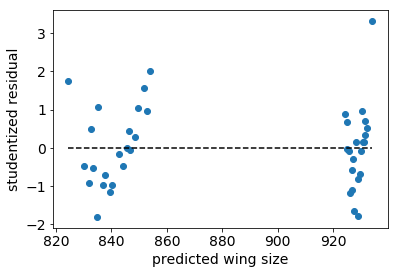

In [103]:
plot_resids(insects_model_inter)

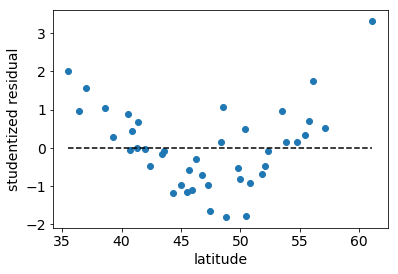

In [105]:
plot_resids(insects_model_inter, feature='latitude', data=insects)

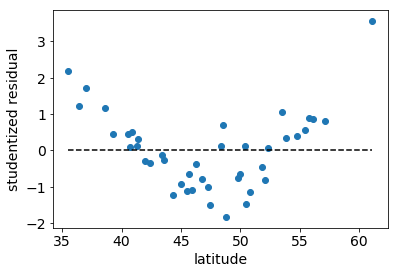

In [106]:
plot_resids(insects_model_with_sex, feature='latitude', data=insects)

### Accounting for the Curvature of the Data Points

We can account for the curvature of the data points by using a *polynomial regression*.  This means that we fit powers of latitude bigger than one:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Latitude}^2 +  d \times \text{Sex} $$

In [107]:
insects['lat_sq'] = insects['latitude']**2

In [108]:
linear_model = sm.OLS(insects['wingsize'], 
                      sm.add_constant(insects[['latitude','lat_sq','sex']]))
insects_model_quad = linear_model.fit()
insects_model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     245.6
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           6.48e-25
Time:                        14:12:14   Log-Likelihood:                -159.14
No. Observations:                  42   AIC:                             326.3
Df Residuals:                      38   BIC:                             333.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1946.8863     91.875     21.191      0.000    1760.895    2132.878
latitude     -43.2140      3.893    -11.101      0.000     -51.094     -35.334
lat_sq         0.4513      0.041     11.031      0.000       0.368       0.534
sex          -89.4629      3.807    -23.499      0.000     -97.170     -81.756
==============================================================================
Omnibus:                        5.109   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.052
Skew:                           0.508   Prob(JB):                        0.132
Kurtosis:                       4.133   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
insects_model_quad.params

const       1946.886344
latitude     -43.214023
lat_sq         0.451328
sex          -89.462873
dtype: float64

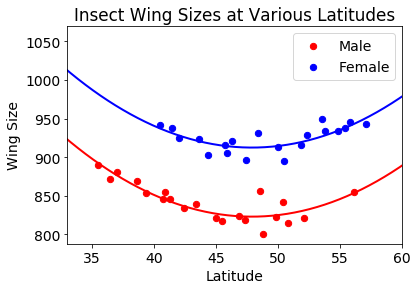

In [110]:
# Make a scatterplot of the data.
make_insect_scatter()

x = np.linspace(30, 60, num=250)

b0, b1, b2, b3 = insects_model_quad.params

plt.plot(x, b0 
             + b1 * x
             + b2 * (x**2),
       linewidth=2, c="blue")
plt.plot(x, b0 
             + b1 * x
             + b2 * (x**2)
             + b3,
       linewidth=2, c="red")
plt.xlim(33, 60)
plt.xlabel("Latitude")
plt.ylabel("Wing Size")
plt.title("Insect Wing Sizes at Various Latitudes")
plt.legend();

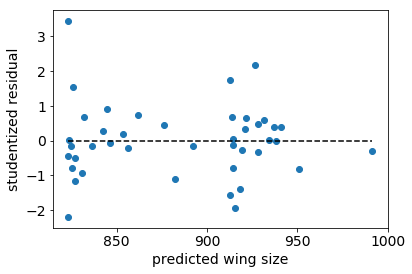

In [111]:
plot_resids(insects_model_quad)

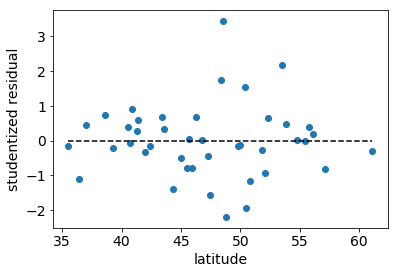

In [112]:
plot_resids(insects_model_quad, feature='latitude', data=insects)

### Adding Continent to the mix

Let's use our model to answer an inferential question: does continent has any effect on wing size?

To accomplish this, we modify our model from this:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Latitude}^2 +  d \times \text{Sex} $$

to the slightly more complicated

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Latitude}^2 +  d \times \text{Sex} + e \times \text{Continent} $$

Then the new number $e$ captures the effect of the insect being found on the continent labeled $1$.  **If $e$ is zero, or close to zero, then continent has no effect on wing span**.

Let's estimate the model:

In [113]:
linear_model = sm.OLS(insects['wingsize'], 
                      sm.add_constant(insects[['latitude','lat_sq',
                                               'sex', 'continent']]))
insects_model_quad_with_continent = linear_model.fit()
insects_model_quad_with_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wingsize   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     186.1
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           5.83e-24
Time:                        14:14:08   Log-Likelihood:                -158.41
No. Observations:                  42   AIC:                             326.8
Df Residuals:                      37   BIC:                             335.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1945.3896     91.505     21.260      0.000    1759.983    2130.796
latitude     -42.9562      3.883    -11.062      0.000     -50.824     -35.088
lat_sq         0.4477      0.041     10.953      0.000       0.365       0.530
sex          -89.9019      3.811    -23.593      0.000     -97.623     -82.181
continent     -4.1069      3.580     -1.147      0.259     -11.361       3.148
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.455
Skew:                           0.257   Prob(JB):                        0.483
Kurtosis:                       3.753   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

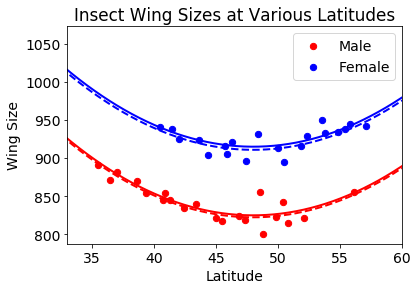

In [114]:
fig, ax = plt.subplots()

# Make a scatterplot of the data.
make_insect_scatter()

x = np.linspace(30, 60, num=250)

b0, b1, b2, b3, b4 = insects_model_quad_with_continent.params

ax.plot(x, b0 + b1*x + b2*(x**2),
       linewidth=2, c="blue")
ax.plot(x, b0
             + b1 * x
             + b2 * (x**2)
             + b4,
       linewidth=2, c="blue", linestyle="--")
ax.plot(x, b0
             + b1 * x
             + b2 * (x**2)
             + b3,
       linewidth=2, c="red")
ax.plot(x, insects_model_quad.params[0] 
             + b1 * x
             + b2 * (x**2)
             + b3
             + b4,
       linewidth=2, c="red", linestyle="--")
ax.set_xlim(33, 60)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")
ax.legend();

`Continent` doesn't make a big difference.